In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [55]:

def determine_garbled_threshold(results_file):
    df = pd.read_csv(results_file)
    df = df[:20]
    df.head()

    df['CER'] = df['CER'].apply(lambda x: float(x.split()[0]) if pd.notnull(x) else np.nan) # reformat df (values concatenated)

    # Additional statistics
    mean_value = np.mean(df['CER'])
    median_value = np.median(df['CER'])
    std_deviation = np.std(df['CER'])
    q25, q75 = np.percentile(df['CER'], [25, 75])

    print(f"Mean: {mean_value}")
    print(f"Median: {median_value}")
    print(f"Standard Deviation: {std_deviation}")
    print(f"Interquartile Range (IQR): {q75 - q25}")

    # Display summary statistics
    summary_stats = df['CER'].describe()
    print("Summary Statistics:")
    print(summary_stats)

    # Plot a histogram of CER values using seaborn for better visualization
    plt.figure(figsize=(10, 6))
    sns.histplot(df['CER'], bins = 10, kde = True, color='skyblue', edgecolor='black')
    plt.title('Distribution of CER Values')
    plt.xlabel('CER')
    plt.ylabel('Number of Documents')
    plt.grid(True)
    plt.show()

    return summary_stats


Mean: 0.21624
Median: 0.16695
Standard Deviation: 0.13492310180247116
Interquartile Range (IQR): 0.242225
Summary Statistics:
count    20.000000
mean      0.216240
std       0.138428
min       0.063500
25%       0.108650
50%       0.166950
75%       0.350875
max       0.555300
Name: CER, dtype: float64


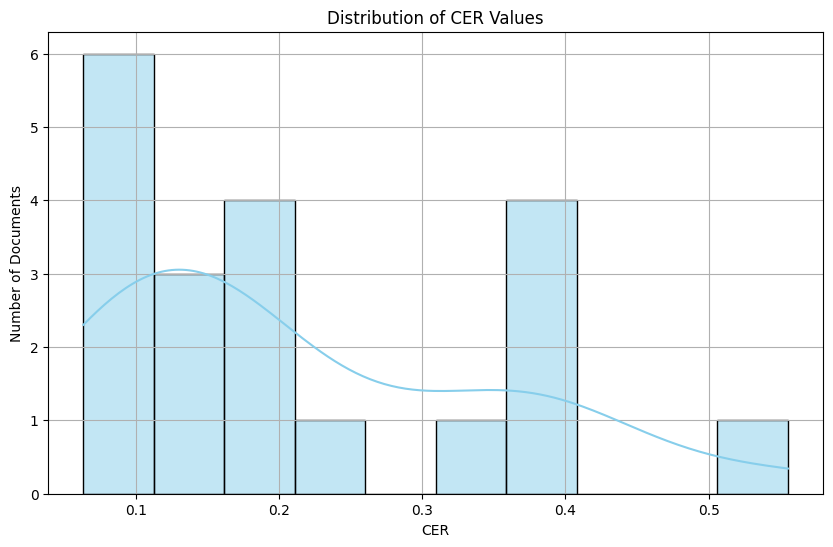

In [56]:
# Example usage
results_file = "C:\\Users\\larak\\OneDrive\\Documents\\GitHub\\HL-Fall-23\\fall-23-project\\calculate_cer\\cer_results_manual.csv"
summary = determine_garbled_threshold(results_file)